<a href="https://colab.research.google.com/github/juli-ter/Project_SAS/blob/master/4_PCA_%2B_clust_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd 
pd.options.display.max_columns = 200
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler 
from matplotlib import pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive/')
path = "/content/drive/My Drive/Optimisation/"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [55]:

df = pd.read_csv(path+'showcase_april.csv', encoding='utf-8')#выгружаем витрину
data = df.drop(['Unnamed: 0'], axis=1)
data.head()

Телефон_new  Revenue     Marge  КоличествоПроданоКлиенту  \
0  32555749-545749525150 .   1039.0    174.66                         5   
1  55574848-48485149515175  62740.0  27213.00                         2   
2  55574848-48494948544878   2560.0    380.66                         7   
3  55574848-48504852495679   1679.0   -374.75                         1   
4  55574848-48504951495271  18080.0   1580.00                         1   

   КоличествоЧеков  СреднийЧек  СреднийЧислоТоваровЧека  СредняяМаржа  \
0                1      1039.0                      5.0        174.66   
1                1     62740.0                      2.0      27213.00   
2                1      2560.0                      7.0        380.66   
3                1      1679.0                      1.0       -374.75   
4                1     18080.0                      1.0       1580.00   

   АВТОКРЕСЛА  АКСЕССУАРЫ  АКСЕССУАРЫ ДЛЯ ВОЛОС  АКСЕССУАРЫ ДЛЯ ДЕВОЧЕК  \
0         0.0         0.0                   0.0                     0.0   
1         0.0         0.0                   0.0                     0.0   
2         0.0         0.0                   0.0                     0.0   
3         0.0         0.0                   0.0                     0.0   
4         0.0         0.0                   0.0                     0.0   

   АКСЕССУАРЫ МАКИЯЖ, МАНИКЮР  АКТИВНЫЙ ОТДЫХ  БАКАЛЕЯ  БИЖУТЕРИЯ  БУТЫЛОЧКИ  \
0                         0.0             0.0      0.0        0.0        0.0   
1                         0.0             0.0      0.0        0.0        0.0   
2                         0.0             0.0      0.0        0.0        0.0   
3                         0.0             0.0      0.0        0.0        0.0   
4                         0.0             0.0      0.0        0.0        0.0   

   БЫТОВАЯ ХИМИЯ ДЛЯ ЖИВОТНЫХ  ВЕЛОСИПЕДЫ/САМОКАТЫ  ВЕРХНЯЯ ДЕТСКАЯ ОДЕЖДА  \
0                         0.0                  0.0                     0.0   
1                         0.0                  0.0                     0.0   
2                         0.0                  0.0                     0.0   
3                         0.0                  0.0                     0.0   
4                         0.0                  0.0                     0.0   

   ВИТАМИНЫ/БАДЫ  ВСЁ ДЛЯ ПРАЗДНИКА  ГАЛАНТЕРЕЯ  \
0            0.0                0.0         0.0   
1            0.0                0.0         0.0   
2            0.0                0.0         0.0   
3            0.0                0.0         0.0   
4            0.0                0.0         0.0   

   ГОЛОВНЫЕ УБОРЫ, ВАРЕЖКИ, ПЕРЧАТКИ  ДЕТСКАЯ КОСМЕТИКА  \
0                           0.000000                0.0   
1                           0.000000                0.0   
2                           0.428571                0.0   
3                           0.000000                0.0   
4                           0.000000                0.0   

   ДЕТСКАЯ МЕБЕЛЬ, МАТРАСЫ  ДЕТСКАЯ ОДЕЖДА (2-6 лет)  \
0                      0.0                  0.000000   
1                      0.0                  0.000000   
2                      0.0                  0.142857   
3                      0.0                  0.000000   
4                      0.0                  0.000000   

   ДЕТСКАЯ ОДЕЖДА (7-16 лет)  ДЕТСКИЕ КОЛГОТКИ И НОСКИ  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

   ДЕТСКИЕ СТУЛЬЯ ДЛЯ КОРМЛЕНИЯ  ДЕТСКОЕ БЕЛЬЁ  ЗАМЕНИТЕЛИ МОЛОКА  ЗЕРКАЛА  \
0                           0.0            0.0                0.0      0.0   
1                           0.0            0.0                0.0      0.0   
2                           0.0            0.0                0.0      0.0   
3                           0.0            0.0                0.

In [57]:
data1 = data.drop(['Телефон_new'], axis=1)

data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32431 entries, 0 to 32430
Columns: 105 entries, Revenue to Регионы
dtypes: float64(103), int64(2)
memory usage: 26.0 MB


In [58]:
scaler = StandardScaler()
scaler.fit(data1)
data1 = pd.DataFrame(scaler.transform(data1), index=data1.index, columns=data1.columns)
#standardize the dataset

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


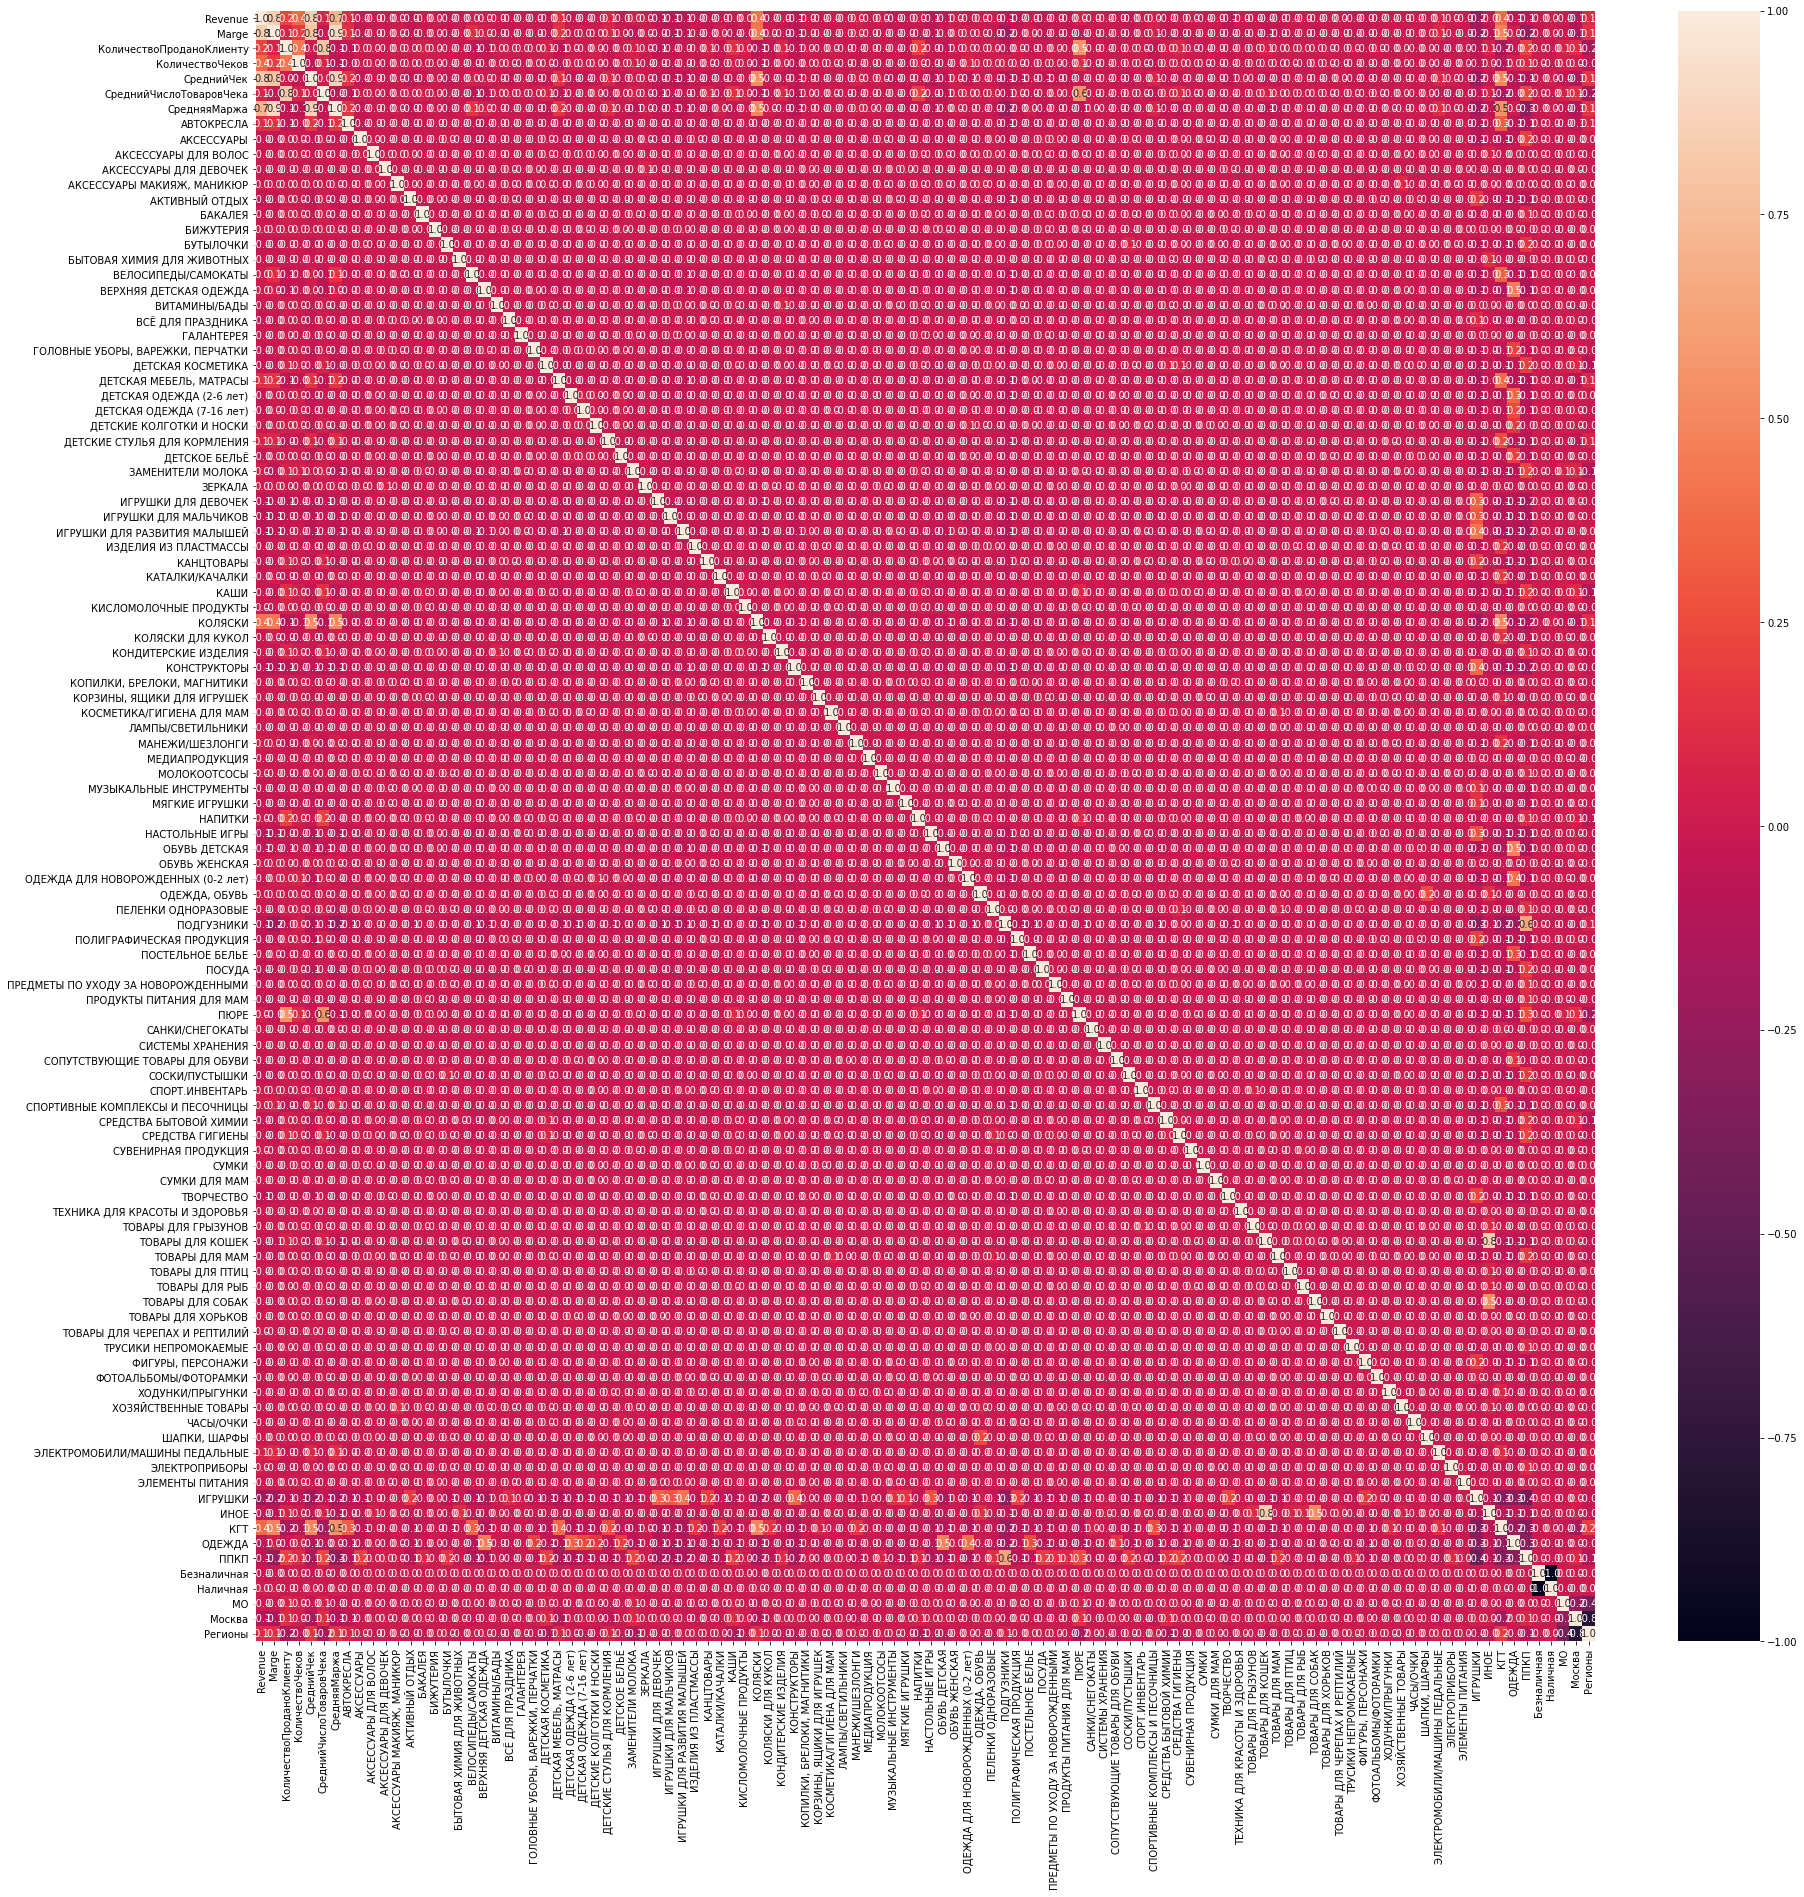

In [ ]:
import seaborn as sns
plt.figure(figsize=(30, 30)) 
sns.heatmap(data1.corr(), annot=True, fmt=".1f") 
plt.show()
#построили матрицу ковариации

In [6]:
def get_corr_cols(data, treshold): 
    corr_matrix = data.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k =1).astype(np.bool))
    to_drop = [column for column in upper.columns if any(upper[column] > treshold)]
    return to_drop

def trimm_correlated(df_in, threshold):
    df_corr = df_in.corr(method='pearson', min_periods=1) 
    df_not_correlated = ~(df_corr.mask(np.tril(np.ones([len(df_corr)]*2, dtype=bool))).abs() > threshold).any()
    un_corr_idx = df_not_correlated.loc[df_not_correlated[df_not_correlated.index] == True].index 
    df_out = df_in[un_corr_idx] 
    return df_out

In [59]:
data_drop_corr = trimm_correlated(data1, 0.6)

In [60]:
data_drop_corr

Revenue  КоличествоПроданоКлиенту  КоличествоЧеков  АВТОКРЕСЛА  \
0      -0.518536                  0.005471        -0.286246   -0.147949   
1      11.886317                 -0.293388        -0.286246   -0.147949   
2      -0.212742                  0.204710        -0.286246   -0.147949   
3      -0.389865                 -0.393008        -0.286246   -0.147949   
4       2.907520                 -0.393008        -0.286246   -0.147949   
...          ...                       ...              ...         ...   
32426  -0.469480                 -0.094149        -0.286246   -0.147949   
32427  -0.694051                 -0.193769        -0.286246   -0.147949   
32428  -0.649217                 -0.393008        -0.286246   -0.147949   
32429  -0.401727                 -0.393008        -0.286246   -0.147949   
32430  -0.421832                  1.200907        -0.286246   -0.147949   

       АКСЕССУАРЫ  АКСЕССУАРЫ ДЛЯ ВОЛОС  АКСЕССУАРЫ ДЛЯ ДЕВОЧЕК  \
0       -0.164307             -0.026504               -0.029774   
1       -0.164307             -0.026504               -0.029774   
2       -0.164307             -0.026504               -0.029774   
3       -0.164307             -0.026504               -0.029774   
4       -0.164307             -0.026504               -0.029774   
...           ...                   ...                     ...   
32426   -0.164307             -0.026504               -0.029774   
32427   -0.164307             -0.026504               -0.029774   
32428   -0.164307             -0.026504               -0.029774   
32429   -0.164307             -0.026504               -0.029774   
32430   -0.164307             -0.026504               -0.029774   

       АКСЕССУАРЫ МАКИЯЖ, МАНИКЮР  АКТИВНЫЙ ОТДЫХ   БАКАЛЕЯ  БИЖУТЕРИЯ  \
0                       -0.008734       -0.157328 -0.067786  -0.006783   
1                       -0.008734       -0.157328 -0.067786  -0.006783   
2                       -0.008734       -0.157328 -0.067786  -0.006783   
3                       -0.008734       -0.157328 -0.067786  -0.006783   
4                       -0.008734       -0.157328 -0.067786  -0.006783   
...                           ...             ...       ...        ...   
32426                   -0.008734       -0.157328 -0.067786  -0.006783   
32427                   -0.008734       -0.157328 -0.067786  -0.006783   
32428                   -0.008734       -0.157328 -0.067786  -0.006783   
32429                   -0.008734       -0.157328 -0.067786  -0.006783   
32430                   -0.008734       -0.157328 -0.067786  -0.006783   

       БУТЫЛОЧКИ  БЫТОВАЯ ХИМИЯ ДЛЯ ЖИВОТНЫХ  ВЕЛОСИПЕДЫ/САМОКАТЫ  \
0       -0.11331                   -0.013613            -0.157859   
1       -0.11331                   -0.013613            -0.157859   
2       -0.11331                   -0.013613            -0.157859   
3       -0.11331                   -0.013613            -0.157859   
4       -0.11331                   -0.013613            -0.157859   
...          ...                         ...                  ...   
32426   -0.11331                   -0.013613            -0.157859   
32427   -0.11331                   -0.013613            -0.157859   
32428   -0.11331                   -0.013613            -0.157859   
32429   -0.11331                   -0.013613            -0.157859   
32430   -0.11331                   -0.013613            -0.157859   

       ВЕРХНЯЯ ДЕТСКАЯ ОДЕЖДА  ВИТАМИНЫ/БАДЫ  ВСЁ ДЛЯ ПРАЗДНИКА  ГАЛАНТЕРЕЯ  \
0                   -0.205863      -0.007814          -0.069595   -0.009335   
1                   -0.205863      -0.007814          -0.069595   -0.009335   
2                   -0.205863      -0.007814          -0.069595   -0.009335   
3                   -0.205863      -0.007814          -0.069595   -0.009335   
4                   -0.205863      -0.007814          -0.069595   -0.009335   
...                       ...            ...                ...         ...   
32426               -0.205863   

In [61]:
data_drop_corr.info()
rows, cols = data_drop_corr.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32431 entries, 0 to 32430
Data columns (total 98 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Revenue                              32431 non-null  float64
 1   КоличествоПроданоКлиенту             32431 non-null  float64
 2   КоличествоЧеков                      32431 non-null  float64
 3   АВТОКРЕСЛА                           32431 non-null  float64
 4   АКСЕССУАРЫ                           32431 non-null  float64
 5   АКСЕССУАРЫ ДЛЯ ВОЛОС                 32431 non-null  float64
 6   АКСЕССУАРЫ ДЛЯ ДЕВОЧЕК               32431 non-null  float64
 7   АКСЕССУАРЫ МАКИЯЖ, МАНИКЮР           32431 non-null  float64
 8   АКТИВНЫЙ ОТДЫХ                       32431 non-null  float64
 9   БАКАЛЕЯ                              32431 non-null  float64
 10  БИЖУТЕРИЯ                            32431 non-null  float64
 11  БУТЫЛОЧКИ                   

In [62]:
print(rows, cols)

32431 98


In [63]:
X = data_drop_corr.values

In [12]:
from sklearn.decomposition import PCA
from sklearn import metrics
from tqdm import tqdm_notebook as tqdm

In [ ]:
n_components = np.arange(1, 10) 
rmses = []
maes = []
with tqdm(total=len(n_components)) as pbar: 
    for n in n_components:
        pca = PCA(n_components=n)
        pca.fit(X)
        X_pca = pca.transform(X)
        X_pca_inv = pca.inverse_transform(X_pca) 
        diff = X - X_pca_inv
        mse = metrics.mean_squared_error(X, X_pca_inv)
        rmses.append(np.sqrt(mse))
        mae = metrics.mean_absolute_error(X, X_pca_inv) 
        maes.append(mae)
        pbar.update(1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


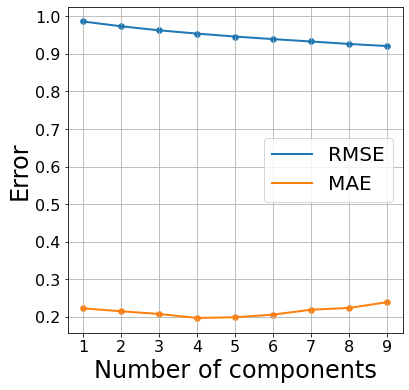

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(n_components, rmses, linewidth=2, label='RMSE') 
plt.scatter(n_components, rmses, linewidth=0.5) 
plt.plot(n_components, maes, linewidth=2, label='MAE') 
plt.scatter(n_components, maes, linewidth=0.5) 
plt.xticks(n_components, size=16)
plt.yticks(size=16)
plt.xlabel('Number of components', size=24) 
plt.ylabel('Error', size=24)
plt.legend(loc='best', fontsize=20)
plt.grid(b=1)
plt.show()

In [ ]:
print("for 3 RMSE:", "%.4f" % rmses[2], ", MSE:", "%.4f" % maes[2])
print("for 4 RMSE:", "%.4f" % rmses[3], ", MSE:", "%.4f" % maes[3])

for 3 RMSE: 0.9627 , MSE: 0.2073
for 4 RMSE: 0.9539 , MSE: 0.1966


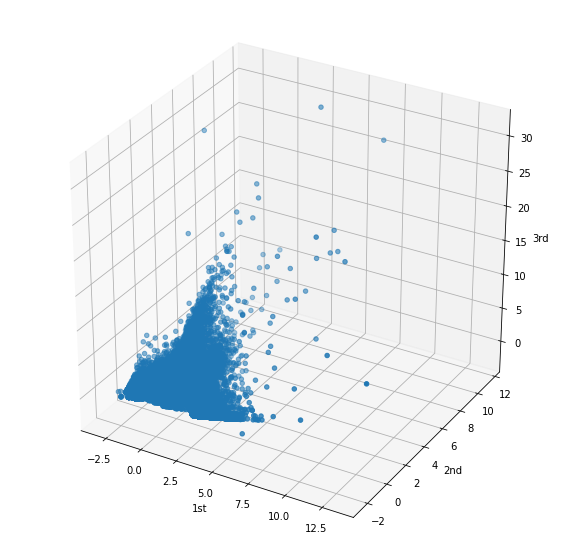

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(principalComponents, columns = ['principal component 1', 
                                                           'principal component 2', 
                                                           'principal component 3'])
x = principalDf['principal component 1']
y = principalDf['principal component 2']
z = principalDf['principal component 3']

#threedee = plt.figure().gca(projection='3d')
#threedee.scatter(x, y, z)

threedee= plt.figure(figsize=(10, 10)).add_subplot(111, projection= '3d')
threedee.scatter(x,y,z)

threedee.set_xlabel('1st')
threedee.set_ylabel('2nd')
threedee.set_zlabel('3rd')

#threedee.plot(x, z, 'r+', zdir='y', zs=1.5)
#threedee.plot(y, z, 'g+', zdir='x', zs=-0.5)
#threedee.plot(x, y, 'k+', zdir='z', zs=-1.5)

#threedee.set_xlim([-5, 35])
#threedee.set_ylim([-10, 40])
#threedee.set_zlim([-5, 25])

plt.show()

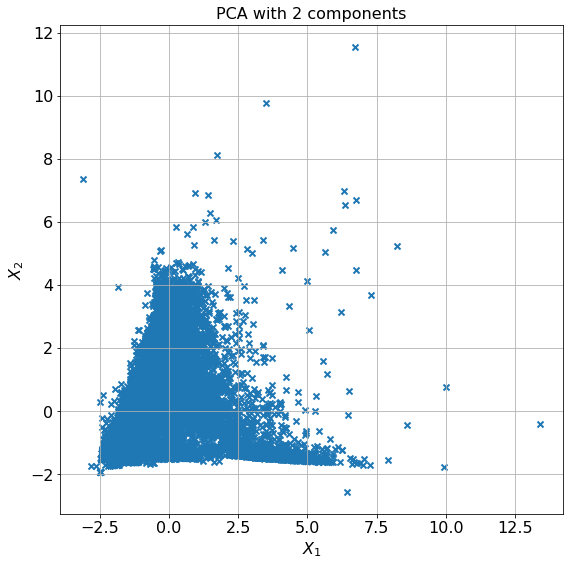

In [ ]:
pca = PCA(n_components=2) 
pca.fit(X)
X_pca_2 = pca.transform(X)
plt.figure(figsize=(9, 9))
plt.scatter(X_pca_2[:, 0], X_pca_2[:, 1], linewidth=2, marker="x") 
plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel(r'$X_{1}$', size=16)
plt.ylabel(r'$X_{2}$', size=16)
plt.title("PCA with 2 components", size=16)
plt.grid(b=1)
plt.show()

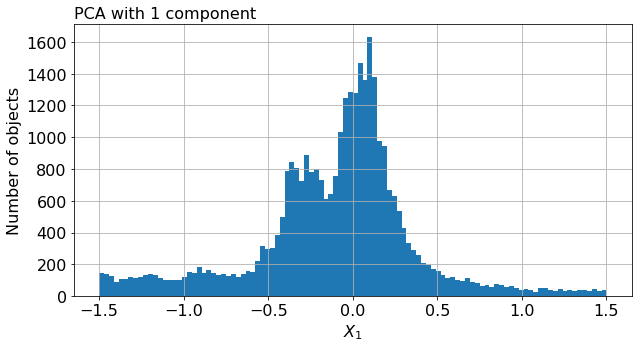

In [ ]:
import numpy as np

pca = PCA(n_components = 1)
XPCAreduced = pca.fit_transform(X)

plt.figure(figsize=(10, 5))
bins = np.linspace(-1.5, 1.5, 105)
plt.hist(XPCAreduced[:, 0], bins=bins)
plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel(r'$X_{1}$', size=16)
plt.ylabel(r'Number of objects', size=16) 
plt.title("PCA with 1 component", loc='left', size=16)
plt.grid(b=1) #show lines
plt.show()



In [ ]:
print ('Explained variance ratio: ', pca.explained_variance_ratio_)

Explained variance ratio:  [0.02683242 0.02437599 0.02131354 0.01627295 0.01277263 0.01210973
 0.01167911 0.01150078 0.01067517]


In [21]:
def plot_clusters_2D(X, labels):
    pca = PCA(n_components=2)
    pca.fit(X)
    X_pca_2 = pca.transform(X)
    plt.figure(figsize=(10, 10)) 
    for lab in np.unique(labels):
        plt.scatter(X_pca_2[labels==lab, 0], X_pca_2[labels==lab, 1 ], linewidth=2, marker="x", label=str(lab), alpha=0.3)
    plt.xticks(size=16)
    plt.yticks(size=16)
    plt.xlabel(r'$X_{1}$', size=16)
    plt.ylabel(r'$X_{2}$', size=16)
    plt.title("PCA with 2 components", loc='left', size=16) 
    plt.legend(loc='best', fontsize=16)
    plt.grid(b=1) 
    plt.show()

In [14]:
from tqdm import tqdm, tnrange
from sklearn.cluster import KMeans

In [64]:
n_clusters = np.arange(2, 7)
silhouette = []
sum_of_squared_distances = []
with tqdm(total=len(n_clusters)) as pbar: 
    for n in n_clusters:
        clusterer = KMeans(n_clusters=n, random_state=11, n_jobs=-1)
        clusterer.fit(X)
        sum_of_squared_distances.append(clusterer.inertia_)
        labels = clusterer.predict(X)
        score = metrics.silhouette_score(X, labels, random_state=11)
        silhouette.append(score) 
        pbar.update(1)

100%|██████████| 5/5 [01:38<00:00, 19.71s/it]


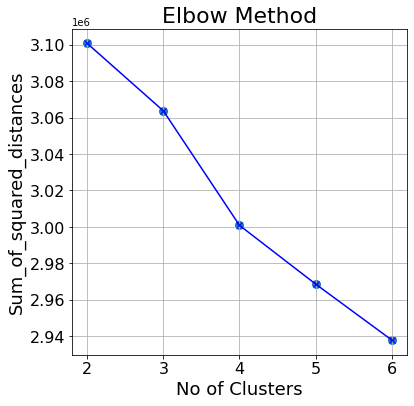

In [65]:
plt.figure(figsize=(6, 6))

plt.plot(n_clusters, sum_of_squared_distances, 'bx-')
plt.scatter(n_clusters, sum_of_squared_distances, linewidth=3) 
plt.xticks(n_clusters, size=16)
plt.yticks(size=16)
plt.xlabel('No of Clusters', size=18)
plt.ylabel('Sum_of_squared_distances', size=18)
plt.title('Elbow Method', size=22)
plt.grid(b=1) 

plt.show()

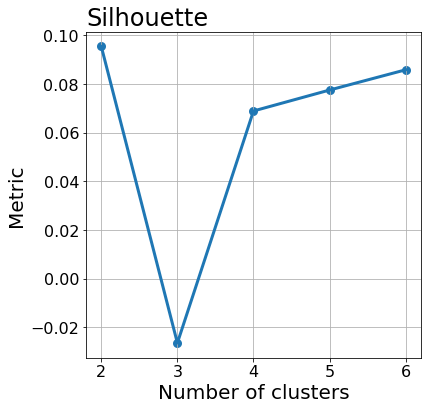

In [66]:
plt.figure(figsize=(6, 6))
plt.plot(n_clusters, silhouette, linewidth=3) 
plt.scatter(n_clusters, silhouette, linewidth=3) 
plt.xticks(n_clusters, size=16)
plt.yticks(size=16)
plt.xlabel('Number of clusters', size=20)
plt.ylabel('Metric', size=20)
plt.title("Silhouette", loc='left', size=24)
plt.grid(b=1) 
plt.show()

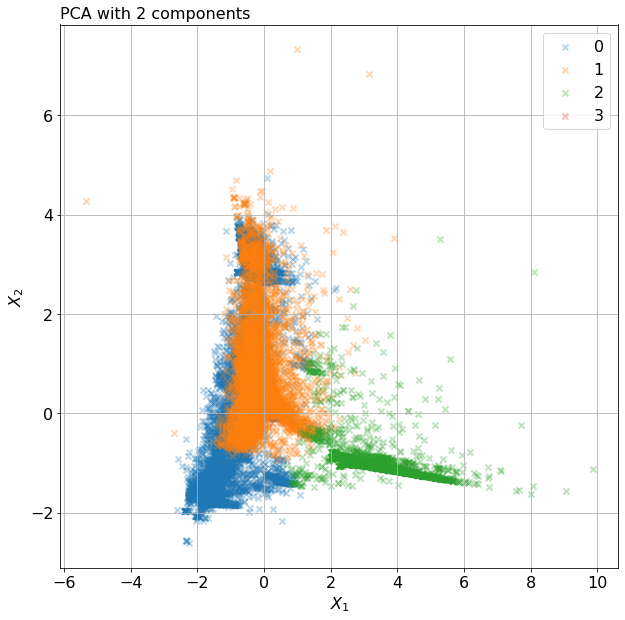

In [67]:
clusterer = KMeans(n_clusters=4, random_state=0, n_jobs=-1) 
clusterer.fit(X)
labels = clusterer.predict(X)
plot_clusters_2D(X, labels)

In [ ]:
data['labels'] = labels

In [68]:
clust1 = 0
clust2 = 0
clust3 = 0
clust4 = 0
for x in labels:
    if x == 0:
        clust1 += 1
    elif x == 1:
        clust2 += 1
    elif x == 2:
        clust3 += 1
    else:
        clust4 += 1

In [ ]:
data

Телефон_new  Revenue     Marge  КоличествоПроданоКлиенту  \
0      32555749-545749525150 .   1039.0    174.66                         5   
1      55494851-56495152535476   1630.0    376.02                         1   
2      55574848-48485149515175  62740.0  27213.00                         2   
3      55574848-48485149515377   4460.0   1467.00                         1   
4      55574848-48494948544878   4801.0    953.85                        12   
...                        ...      ...       ...                       ...   
58025  56575053-49545153535383   1435.0    165.27                         1   
58026  56575454-48485156545486   1620.0    957.89                         1   
58027  56575655-52525750505484   1125.0     95.00                         1   
58028  57484948-48505057565793   1321.0    721.48                         2   
58029  57495452-49485054525597   1520.0    178.72                        17   

       КоличествоЧеков  СреднийЧек  СреднийЧислоТоваровЧека  СредняяМаржа  \
0                    1      1039.0                      5.0       174.660   
1                    1      1630.0                      1.0       376.020   
2                    1     62740.0                      2.0     27213.000   
3                    1      4460.0                      1.0      1467.000   
4                    2      2400.5                      6.0       476.925   
...                ...         ...                      ...           ...   
58025                1      1435.0                      1.0       165.270   
58026                1      1620.0                      1.0       957.890   
58027                1      1125.0                      1.0        95.000   
58028                1      1321.0                      2.0       721.480   
58029                1      1520.0                     17.0       178.720   

       АВТОКРЕСЛА  АКСЕССУАРЫ  АКСЕССУАРЫ ДЛЯ ВОЛОС  АКСЕССУАРЫ ДЛЯ ДЕВОЧЕК  \
0             0.0         0.0                   0.0                     0.0   
1             0.0         0.0                   0.0                     0.0   
2             0.0         0.0                   0.0                     0.0   
3             0.0         0.0                   0.0                     0.0   
4             0.0         0.0                   0.0                     0.0   
...           ...         ...                   ...                     ...   
58025         0.0         0.0                   0.0                     0.0   
58026         0.0         0.0                   0.0                     0.0   
58027         0.0         0.0                   0.0                     0.0   
58028         0.0         0.0                   0.0                     0.0   
58029         0.0         0.0                   0.0                     0.0   

       АКСЕССУАРЫ МАКИЯЖ, МАНИКЮР  АКТИВНЫЙ ОТДЫХ  БАКАЛЕЯ  БИЖУТЕРИЯ  \
0                             0.0             0.0      0.0        0.0   
1                             0.0             0.0      0.0        0.0   
2                             0.0             0.0      0.0        0.0   
3                             0.0             0.0      0.0        0.0   
4                             0.0             0.0      0.0        0.0   
...                           ...             ...      ...        ...   
58025                         0.0             0.0      0.0        0.0   
58026                         0.0             0.0      0.0        0.0   
58027                         0.0             0.0      0.0        0.0   
58028                         0.0             0.0      0.0        0.0   
58029                         0.0             0.0      0.0        0.0   

       БУТЫЛОЧКИ  БЫТОВАЯ ХИМИЯ ДЛЯ ЖИВОТНЫХ  ВЕЛОСИПЕДЫ/САМОКАТЫ  \
0            0.0                         0.0                  0.0   
1            0.0                         0.0                  0.0   
2            0.0                         0.0                  0.0   
3            0.0                         0.

In [70]:
print("1 clust: %.4f" % (clust1/rows))
print("2 clust: %.4f" % (clust2/rows))
print("3 clust: %.4f" % (clust3/rows))
print("4 clust: %.4f" % (clust4/rows))

1 clust: 0.4388
2 clust: 0.3894
3 clust: 0.1717
4 clust: 0.0000


In [69]:
print("1 clust:", clust1)
print("2 clust:", clust2)
print("3 clust:", clust3)
print("4 clust:", clust4)

1 clust: 14231
2 clust: 12629
3 clust: 5570
4 clust: 1


In [ ]:
data.to_csv(path+'labeled_showcase.csv')

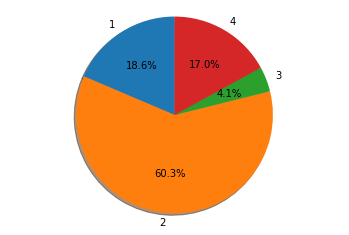

In [ ]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = '1', '2', '3', '4'
sizes = [clust1, clust2, clust3, clust4]
explode = (0, 0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
from sklearn.cluster import DBSCAN


No handles with labels found to put in legend.


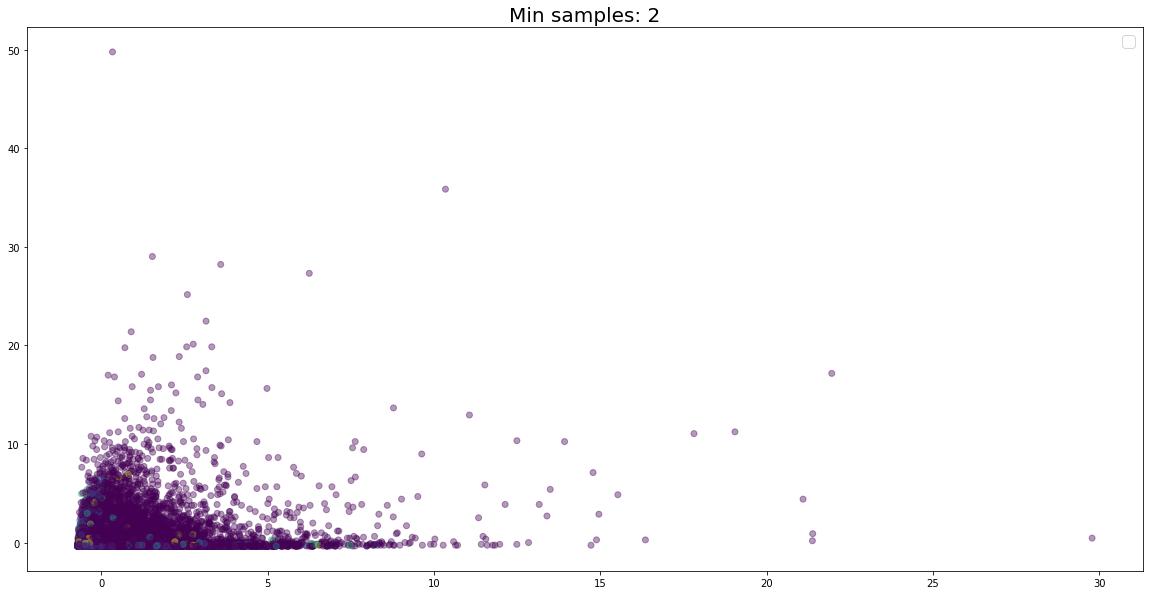

No handles with labels found to put in legend.


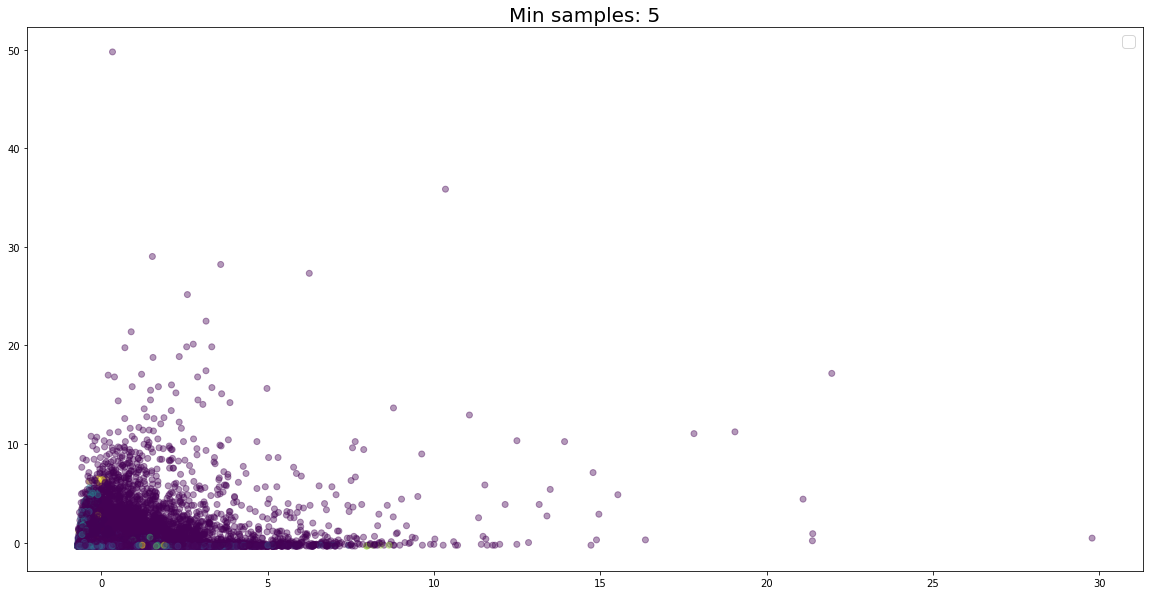

No handles with labels found to put in legend.


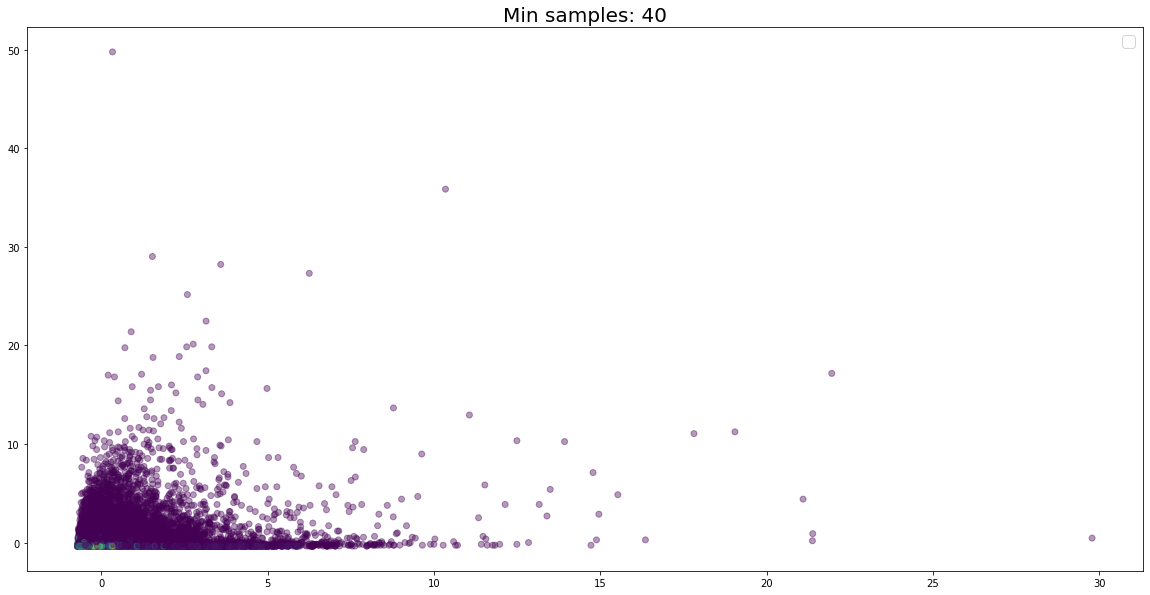

In [ ]:

for samples in [2, 5, 40]:
    dbscan = DBSCAN(min_samples=samples)
    clusters = dbscan.fit_predict(X)
    plt.figure(figsize= (20,10))
    plt.scatter(X[:,0], X[:,1], c = clusters, alpha=0.4)
    plt.legend(loc='best', fontsize=16)
    plt.title("Min samples: %d"%samples, fontsize=20)
    plt.show()

In [ ]:
def plot_clusters_2D_dbscan(X, labels):
    pca = PCA(n_components=2)
    pca.fit(X)
    X_pca_2 = pca.transform(X)
    plt.figure(figsize=(10, 10)) 
    for lab in np.unique(labels):
        plt.scatter(X_pca_2[labels==lab, 0], X_pca_2[labels==lab, 1 ], linewidth=2, marker="x", label=str(lab), alpha=0.3)
    plt.xticks(size=16)
    plt.yticks(size=16)
    plt.xlabel(r'$X_{1}$', size=16)
    plt.ylabel(r'$X_{2}$', size=16)
    plt.title('eps = {}, min_samples = {}'.format(eps, samples), fontsize=20)
    plt.legend(loc='best', fontsize=16)
    plt.grid(b=1) 
    plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

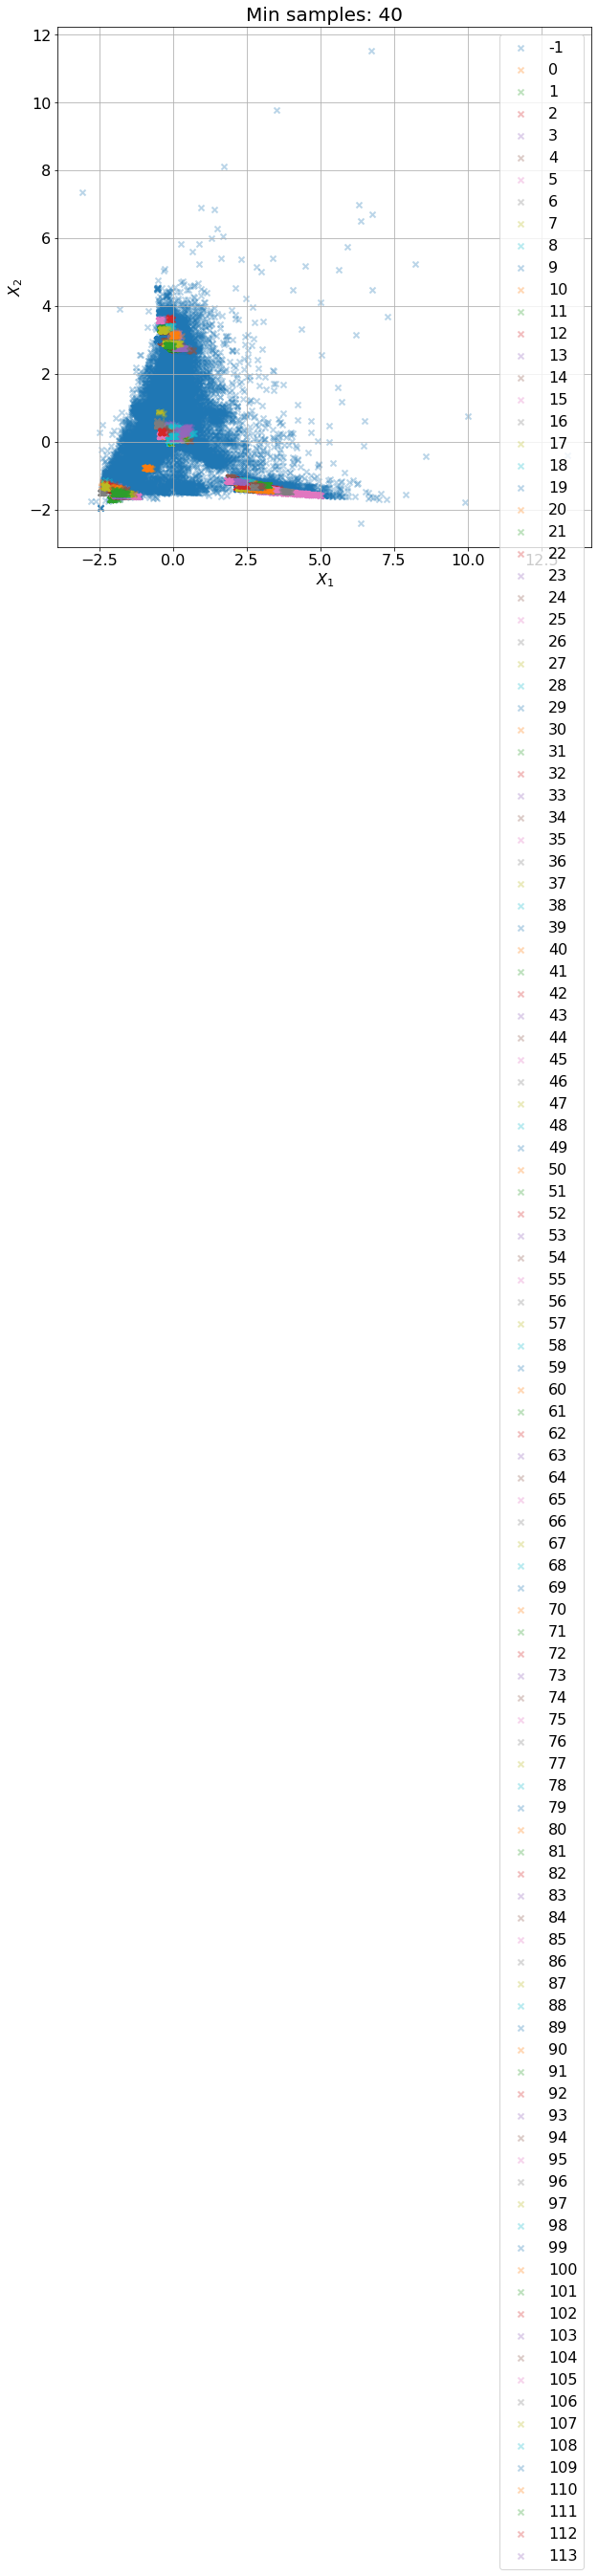

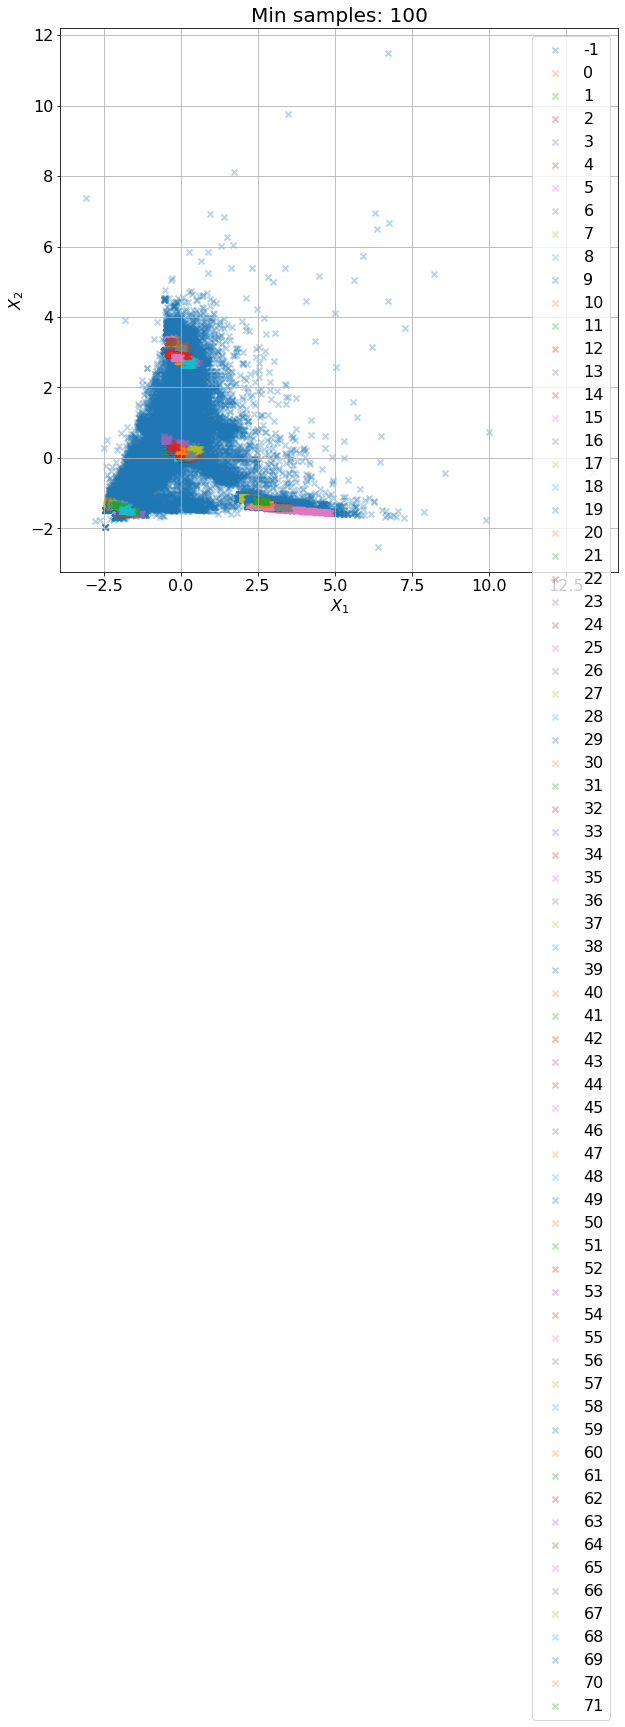

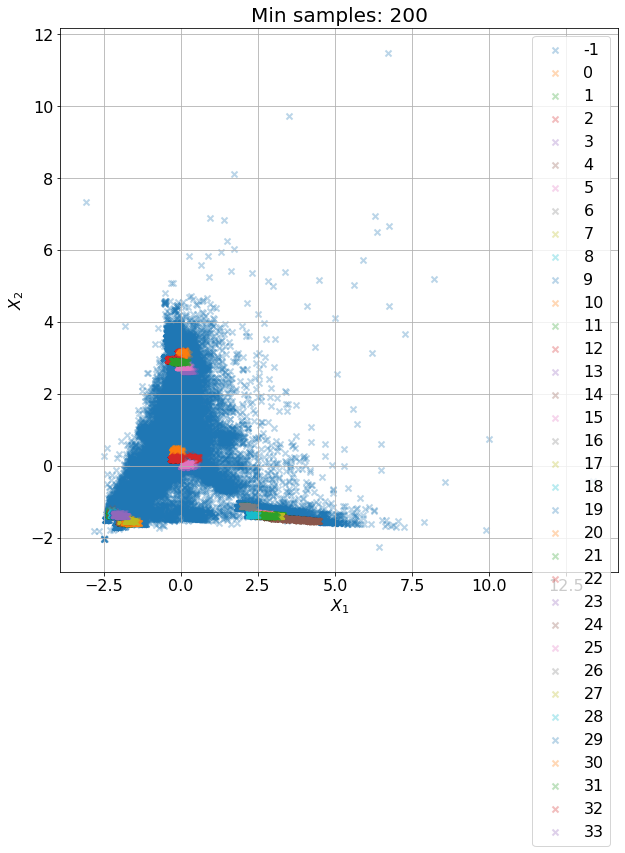

In [ ]:


for samples in [20, 40, 100, 200]:
    dbscan = DBSCAN(min_samples=samples,  n_jobs=-1)
    clusters = dbscan.fit_predict(X)
    plot_clusters_2D_dbscan(X, clusters)
    #plt.scatter(X[:,0], X[:,1], c = clusters, alpha=0.4)


# clusterer = KMeans(n_clusters=4, random_state=0, n_jobs=-1) 
# clusterer.fit(X)
# labels = clusterer.predict(X)
# plot_clusters_2D(X, labels)    

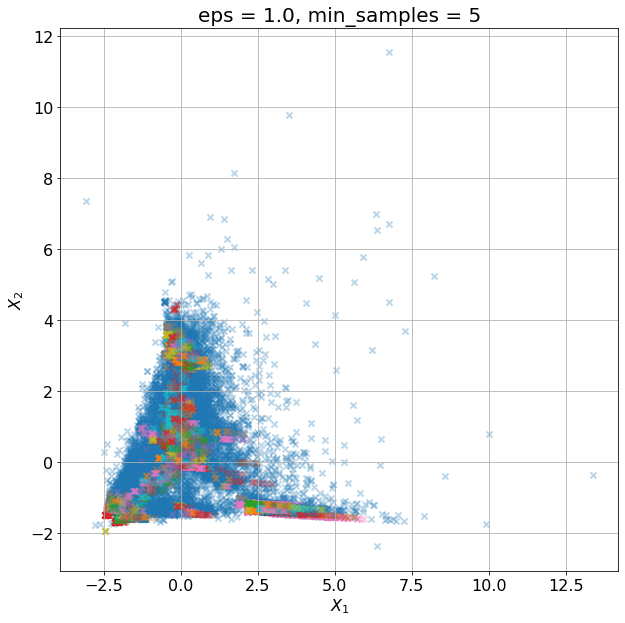

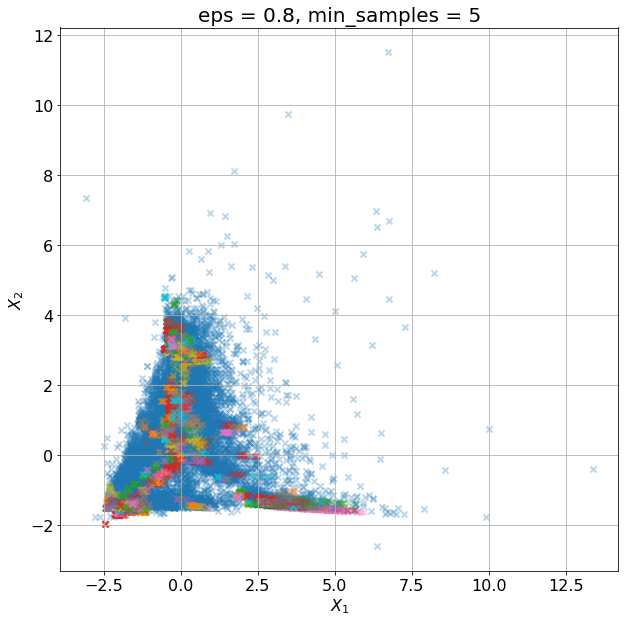

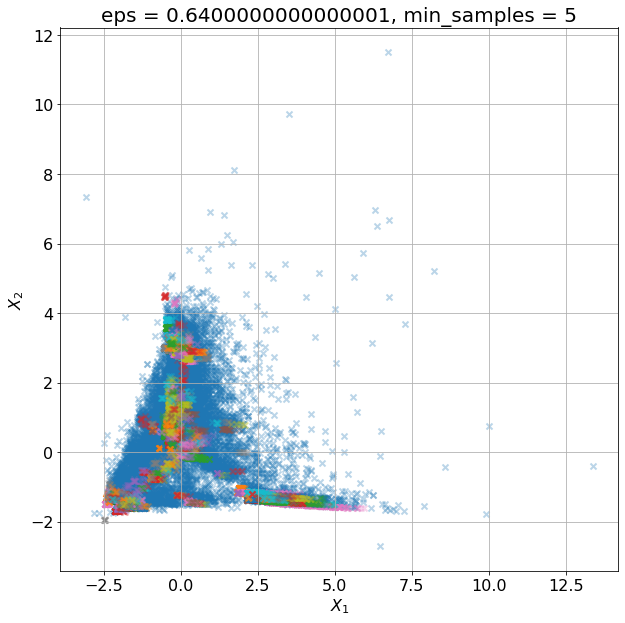

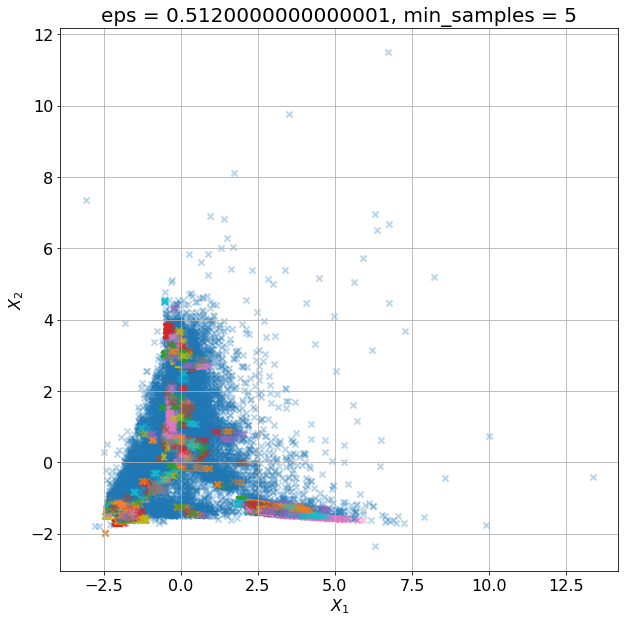

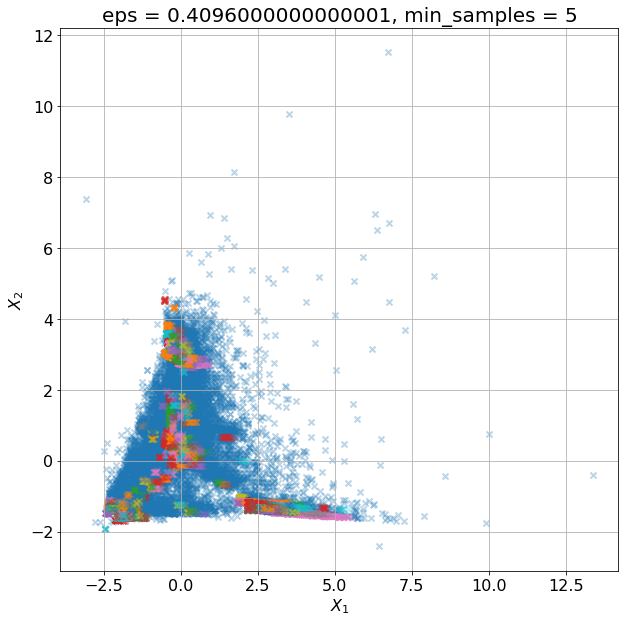

KeyboardInterrupt: ignored

In [ ]:
for samples in [5, 20, 40, 100]:
  for eps in 0.8**np.arange(7):
      dbscan = DBSCAN(min_samples=samples,  eps=eps, n_jobs=-1)
      clusters = dbscan.fit_predict(X)
      plot_clusters_2D_dbscan(X, clusters)

In [ ]:
for samples in [5, 20]:
  for eps in [1, 10]:
      dbscan = DBSCAN(min_samples=samples,  eps=eps, n_jobs=-1)
      clusters = dbscan.fit_predict(X)
      plot_clusters_2D_dbscan(X, clusters)

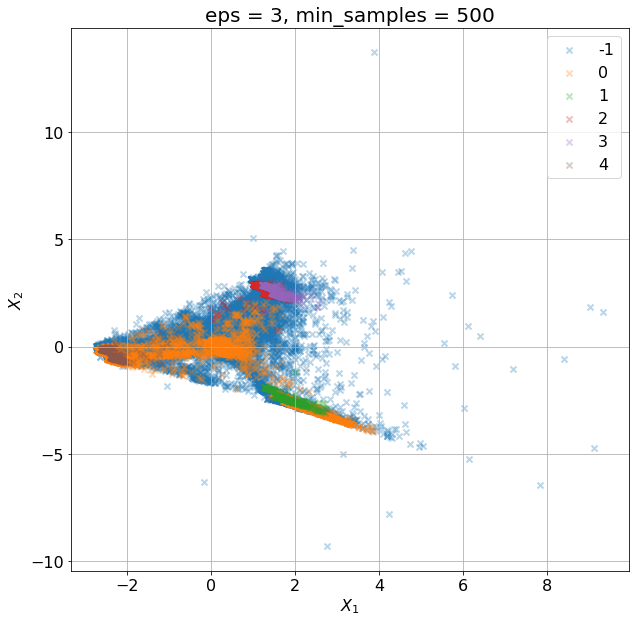

In [ ]:
from sklearn.cluster import DBSCAN
x = X[:20000]
samples = 500
eps = 3
dbscan = DBSCAN(min_samples=samples,  eps=eps, n_jobs=-1)
clusters = dbscan.fit_predict(x)
plot_clusters_2D_dbscan(x, clusters)

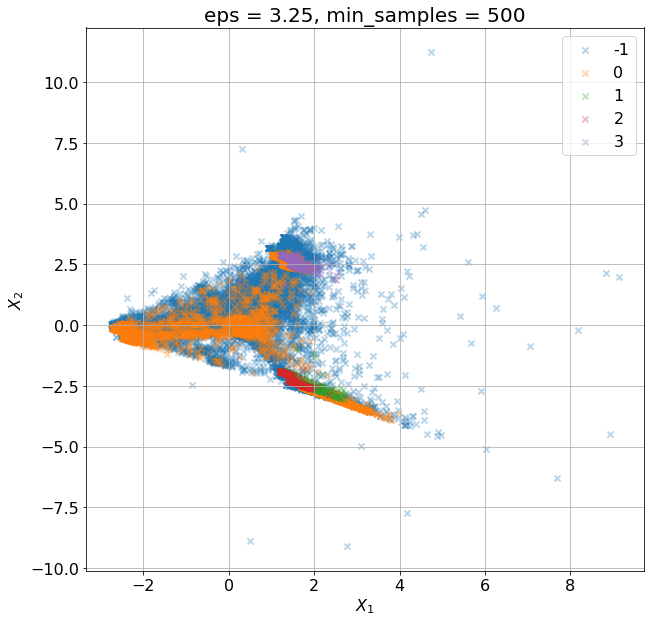

In [ ]:
samples = 500
eps = 3.25
dbscan = DBSCAN(min_samples=samples,  eps=eps, n_jobs=-1)
clusters = dbscan.fit_predict(x)
plot_clusters_2D_dbscan(x, clusters)

In [ ]:
clust_count(dbscan.labels_, half_rows)

1 clust: 0.5557
2 clust: 0.3678
3 clust: 0.0228
4 clust: 0.0536


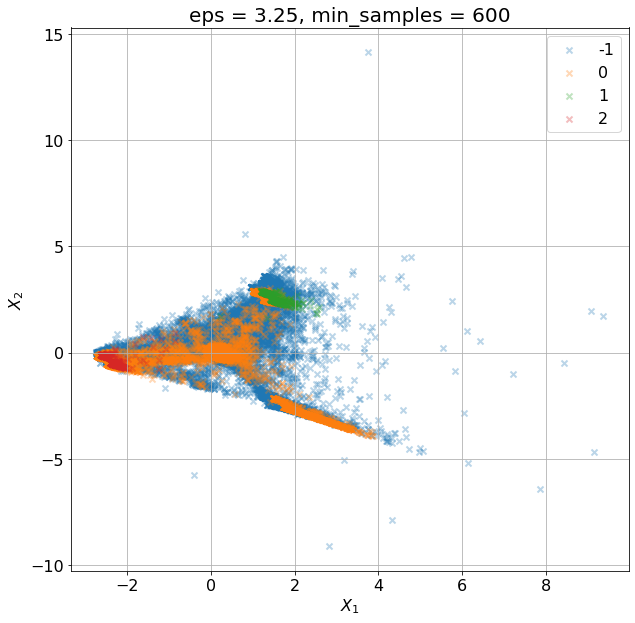

In [ ]:
x = X[:25000]
samples = 600
eps = 3.25
dbscan = DBSCAN(min_samples=samples,  eps=eps, n_jobs=-1)
clusters = dbscan.fit_predict(x)
plot_clusters_2D_dbscan(x, clusters)

In [ ]:
len(x)

20000

In [ ]:
clust_count(dbscan.labels_, half_rows)

1 clust: 0.6024
2 clust: 0.3396
3 clust: 0.0324
4 clust: 0.0256


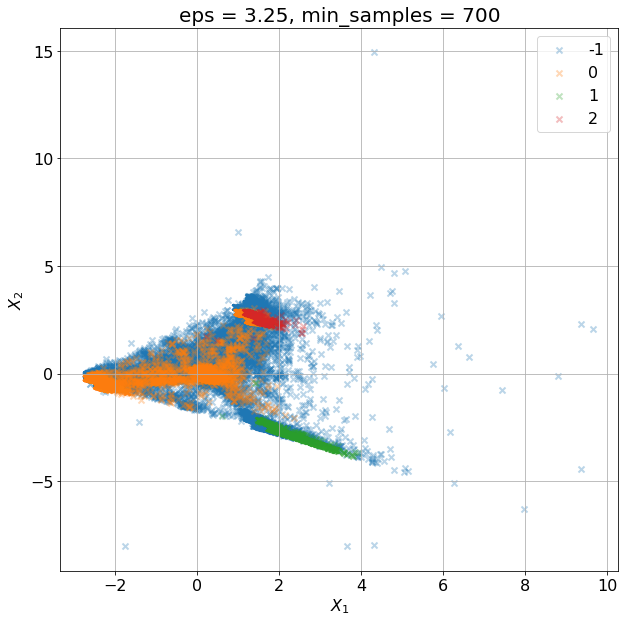

In [ ]:
samples = 700
eps = 3.25
dbscan = DBSCAN(min_samples=samples,  eps=eps, n_jobs=-1)
clusters = dbscan.fit_predict(x)
plot_clusters_2D_dbscan(x, clusters)

In [ ]:
clust_count(dbscan.labels_, half_rows)

1 clust: 0.6334
2 clust: 0.2929
3 clust: 0.0413
4 clust: 0.0324


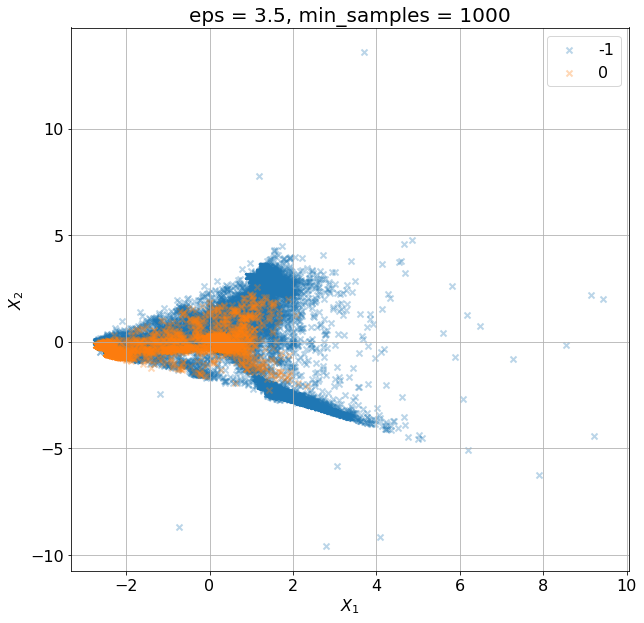

In [ ]:
samples = 1000
eps = 3.5
dbscan = DBSCAN(min_samples=samples,  eps=eps, n_jobs=-1)
clusters = dbscan.fit_predict(x)
plot_clusters_2D_dbscan(x, clusters)

In [ ]:
clust_count(dbscan.labels_, half_rows)

1 clust: 0.7496
2 clust: 0.2504
3 clust: 0.0000
4 clust: 0.0000


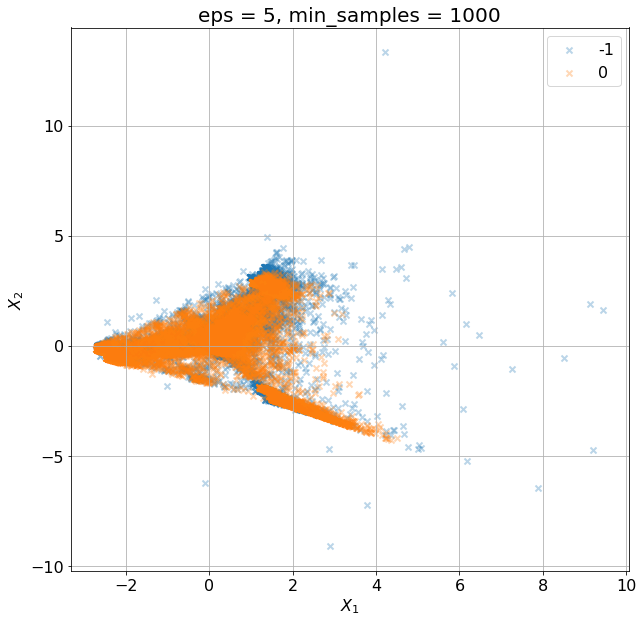

In [ ]:
samples = 1000
eps = 5
dbscan = DBSCAN(min_samples=samples,  eps=eps, n_jobs=-1)
clusters = dbscan.fit_predict(x)
plot_clusters_2D_dbscan(x, clusters)

In [ ]:
clust_count(dbscan.labels_, half_rows)

1 clust: 0.3032
2 clust: 0.6968
3 clust: 0.0000
4 clust: 0.0000


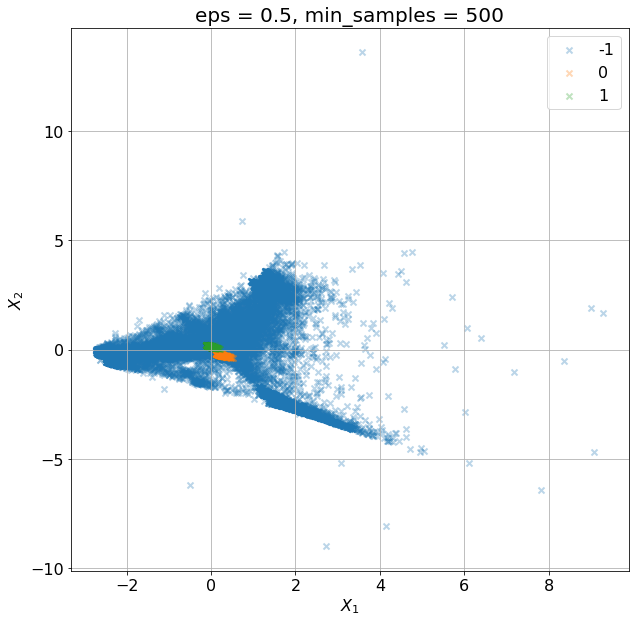

NameError: ignored

In [ ]:
samples = 500
eps = 0.5
dbscan = DBSCAN(min_samples=samples,  eps=eps, n_jobs=-1)
clusters = dbscan.fit_predict(x)
plot_clusters_2D_dbscan(x, clusters)
clust_count(dbscan.labels_, half_rows)

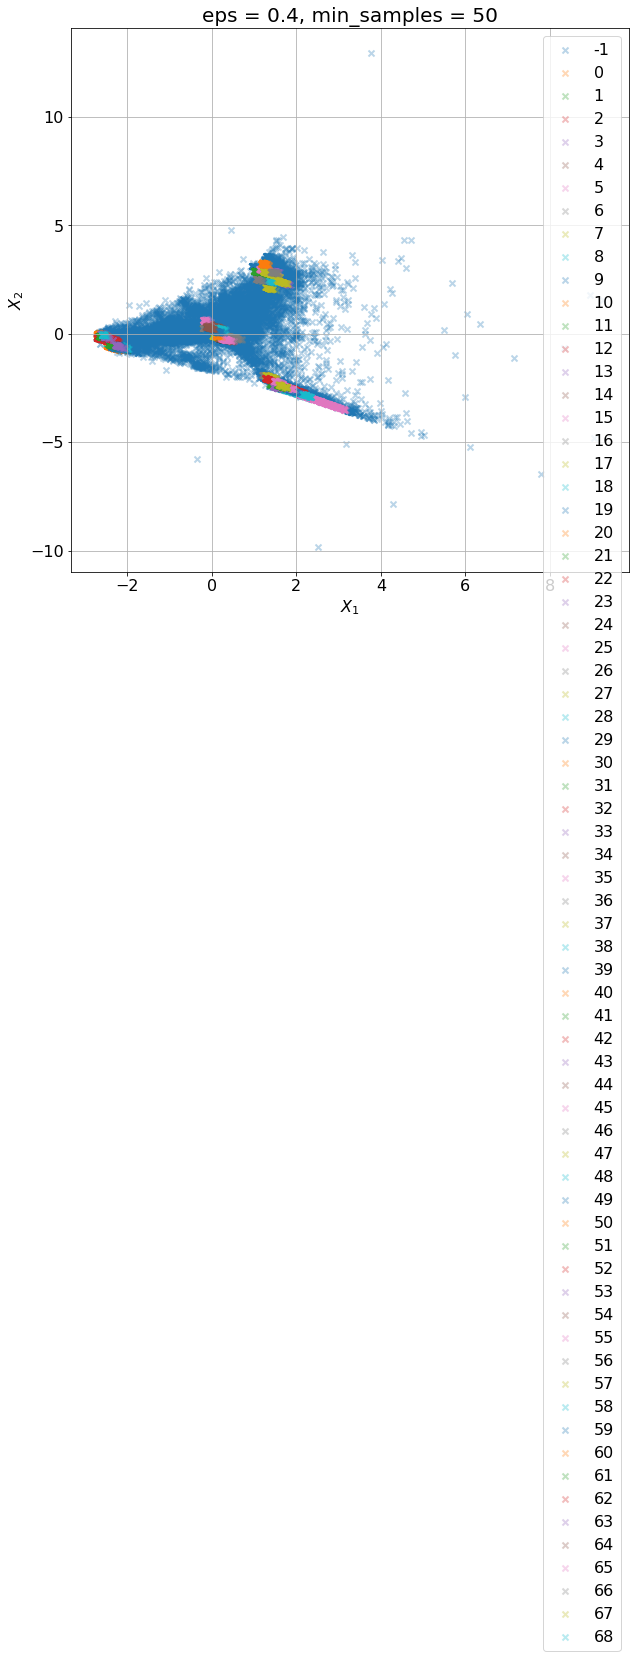

1 clust: 0.5169
2 clust: 0.0026
3 clust: 0.0194
4 clust: 0.4611


In [ ]:
samples = 50
eps = 0.4
dbscan = DBSCAN(min_samples=samples,  eps=eps, n_jobs=-1)
clusters = dbscan.fit_predict(x)
plot_clusters_2D_dbscan(x, clusters)
clust_count(dbscan.labels_, half_rows)

In [ ]:
samples = 5
eps = 0.7
dbscan = DBSCAN(min_samples=samples,  eps=eps, n_jobs=-1)
clusters = dbscan.fit_predict(x)
plot_clusters_2D_dbscan(x, clusters)
clust_count(dbscan.labels_, half_rows)

1 clust: 0.3819
2 clust: 0.0027
3 clust: 0.0194
4 clust: 0.5960


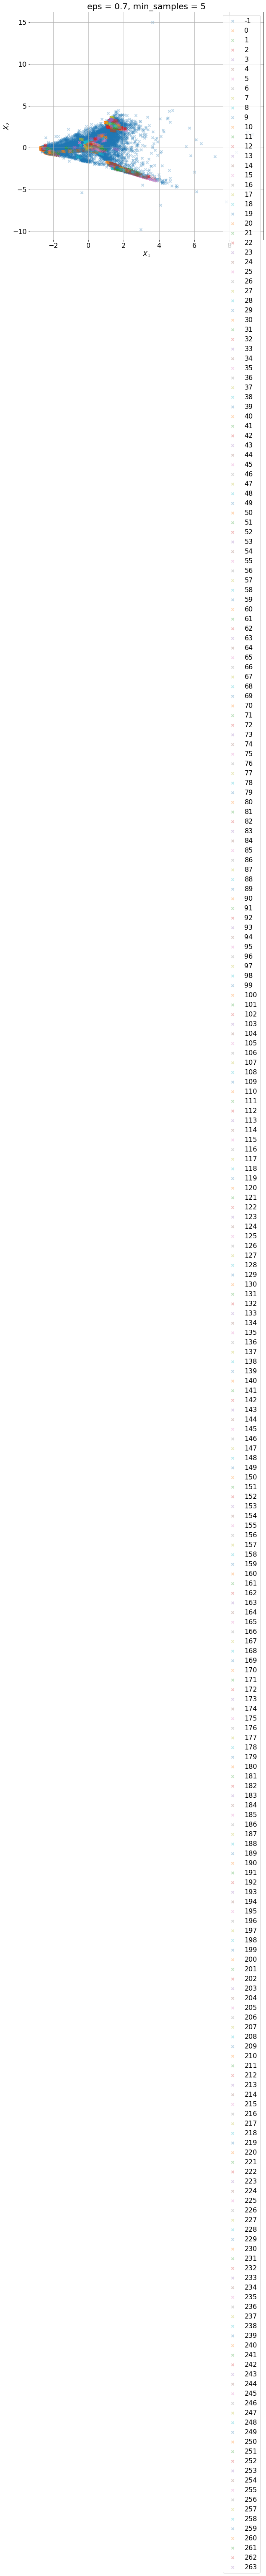

In [ ]:
plot_clusters_2D_dbscan(x, clusters)


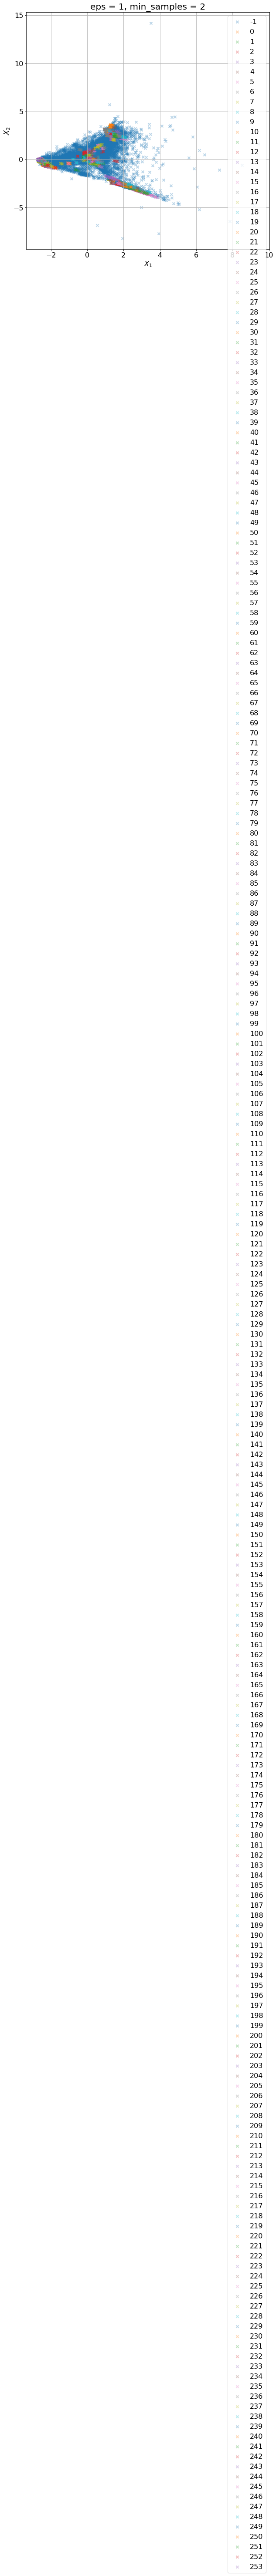

1 clust: 0.3902
2 clust: 0.0026
3 clust: 0.0194
4 clust: 0.5877


In [ ]:
samples = 2
eps = 1
dbscan = DBSCAN(n_jobs=-1)
clusters = dbscan.fit_predict(x)
plot_clusters_2D_dbscan(x, clusters)
clust_count(dbscan.labels_, half_rows)

In [ ]:
samples = 1200
eps = 2
dbscan = DBSCAN(min_samples=samples,  eps=eps, n_jobs=-1)
clusters = dbscan.fit_predict(x)
plot_clusters_2D_dbscan(x, clusters)
clust_count(dbscan.labels_, half_rows)

In [ ]:
labs = []
labs = dbscan.labels_
x = np.array(labs) 
print(np.unique(x)) 

[-1  0  1  2]


In [ ]:

half_rows = len(x)

In [ ]:
def clust_count(labels, amount):
  clust1 = 0
  clust2 = 0
  clust3 = 0
  clust4 = 0
  for x in labels:
      if x == 0:
          clust1 += 1
      elif x == 1:
          clust2 += 1
      elif x == 2:
          clust3 += 1
      elif x == 4:
          clust4 += 1

  print("1 clust: %.4f" % (clust1/amount))
  print("2 clust: %.4f" % (clust2/amount))
  print("3 clust: %.4f" % (clust3/amount))
  print("4 clust: %.4f" % (clust4/amount))

In [ ]:
clust_count(dbscan.labels_, half_rows)

1 clust: 0.6334
2 clust: 0.2929
3 clust: 0.0413
4 clust: 0.0324


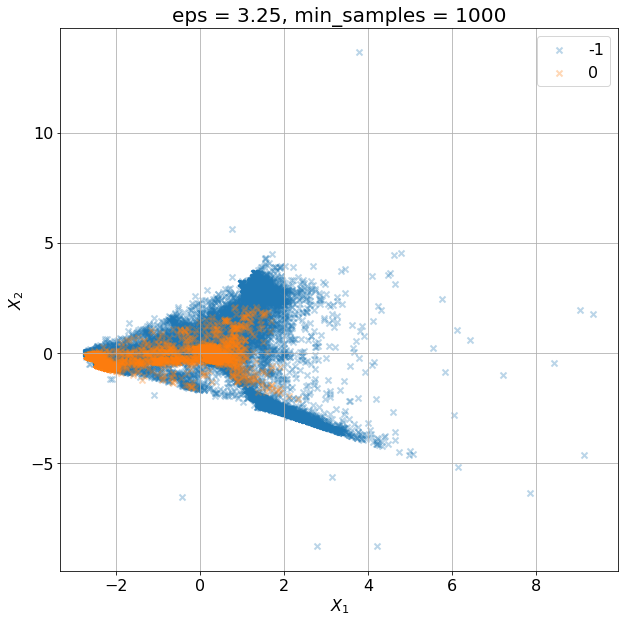

In [ ]:
samples = 1000
eps = 3.25
dbscan = DBSCAN(min_samples=samples,  eps=eps, n_jobs=-1)
clusters = dbscan.fit_predict(x)
plot_clusters_2D_dbscan(x, clusters)

In [ ]:
clust_count(dbscan.labels_, half_rows)

1 clust: 0.6714
2 clust: 0.2237
3 clust: 0.0410
4 clust: 0.0639
